L'interpolation est une opération mathématique permettant de construire une courbe à partir de la donnée d'un nombre fini de points, ou une fonction à partir de la donnée d'un nombre fini de valeurs. 

In [1]:
#!pip install influxdb
import scipy.interpolate as itp
import matplotlib.pyplot as plt
import numpy as np
from influxdb import InfluxDBClient

In [2]:
stime='2017-01-27 08:00:00.000'
ftime='2017-01-27 10:00:00.000'

In [3]:
client = InfluxDBClient('apolline.lille.inria.fr', '8086', 'Apolline', 'PC2A', 'apolline')
results = client.query('select * from "events.stats.rasp8" where time >\'%s\' and time <\'%s\';'%(stime,ftime))
points = list(results.get_points())

In [4]:
x=[]
y=[]
def readData():
    for i in range(len(points)):
        x.append(i)
        y.append(points[i]['CO2'])
    return x,y

"dis" est utilisé pour confirmer que nous voulons diviser les données en quelle distance. Après sur la base de données discrètes, spline va interpoler la fonction continue, estimer la valeur approximative pour autre point. 

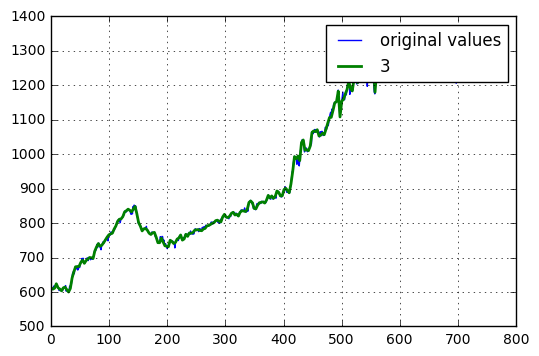

In [5]:
x,y=readData()
plot1=plt.plot(x, y, '-',label='original values')
dis=[3]
xnew=[]
ynew=[]
for d in dis:
    xvals=np.linspace(0,x[len(x)-1],len(x)/d)
    yinterp = itp.spline(x,y,xvals)
    xnew.append(xvals)
    ynew.append(yinterp)
    plot2=plt.plot(xvals, yinterp, linewidth=2)
def getXY():
    return x,y
plt.grid()
plt.legend(['original values',dis[0]], loc='upper right')
plt.show()

La pente de la fonction ajustée, pour comparer.

In [6]:
x,y=getXY()
pente=[]
def getPente():
    for i in range(0,(len(x)-1)):
        pente.append((y[i+1]-y[i])/(x[i+1]-x[i]))
    return pente
s=getPente()